# Neural Network from Scratch


In [2]:
!pip install numpy matplotlib

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ?

In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Data Importing and Preprocessing


In [4]:
# import datasets

X_train = np.loadtxt('data/train_X.csv', delimiter=',')
y_train = np.loadtxt('data/train_label.csv', delimiter=',')

In [5]:
print(X_train.shape)
print(y_train.shape)

(1000, 784)
(1000, 10)


In [6]:
X_train = X_train.T
y_train = y_train.T

In [8]:
X_test = np.loadtxt("data/test_X.csv", delimiter=',').T
y_test = np.loadtxt("data/test_label.csv", delimiter=",").T

print("Final Shapes")
print("shape of X_train : ", X_train.shape)
print("shape of y_train : ", y_train.shape)

print("shape of X_test : ", X_test.shape)
print("shape of y_test : ", y_test.shape)

Final Shapes
shape of X_train :  (784, 1000)
shape of y_train :  (10, 1000)
shape of X_test :  (784, 350)
shape of y_test :  (10, 350)


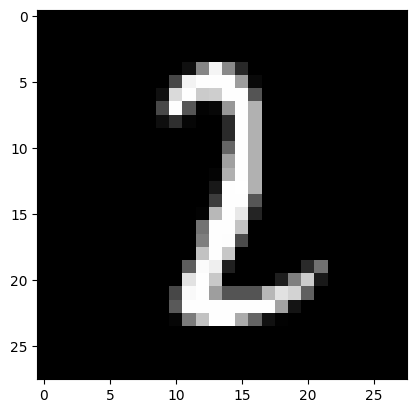

In [9]:
# Visualization

index = int(random.randrange(0, X_train.shape[1]))
plt.imshow(X_train[:, index].reshape((28, 28)), cmap='gray')
plt.show()

## 2. Model


### 2.1 Activation Functions


In [95]:
# tanh: (e^x - e^-x) / (e^x + e^-x)
def tanh(x):
    return np.tanh(x)

In [96]:
tanh_test = [
    (2, 0.9640276),
    (-2, -0.9640276),
    (0, 0.0),
    (10**4, 1.0),
    (-10**4, -1.0),
    (np.inf, 1)
]


def test(function, test_case):
    failures = 0
    for case in test_case:
        if round(function(case[0]), 7) != case[1]:
            print("Failed: ", case, function(case[0]))
            failures += 1
    print("Testing Done")
    print("Failed: ", failures, " / ", len(test_case))

In [97]:
test(tanh, tanh_test)

Testing Done
Failed:  0  /  6


In [98]:
def relu(x):
    return np.maximum(0, x)

In [99]:
def softmax(z):
    exp_z = np.exp(z-np.max(z))
    return exp_z / np.sum(exp_z, axis=0)

In [100]:
def derivative_tanh(x):
    return (1 - np.power(tanh(x), 2))

In [114]:
def derivative_relu(x):
    return np.array(x > 0, dtype=float32)

### 2.2 Parameters Initialization


In [102]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }
    return parameters

## 3. Forward Propagation


In [103]:
def forward_prop(x, parameters, activation=tanh):
    w1, b1, w2, b2 = parameters["w1"], parameters["b1"], parameters["w2"], parameters["b2"]

    z1 = np.dot(w1, x) + b1
    a1 = activation(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return forward_cache

### 4. Cost Function


In [104]:
def cost_function(a2, y):
    # since we have multiclass - we will use cross-entropy
    m = y.shape[0]
    cost = (-1/m)*np.sum(y * np.log(a2))
    return cost

### 5. Backward Propagation


In [105]:
def back_prop(x, y, parameters, forward_cache):
    w1, b1, w2, b2 = parameters["w1"], parameters["b1"], parameters["w2"], parameters["b2"]
    a1, a2 = forward_cache["a1"], forward_cache["a2"]

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis=1, keepdims=True)

    dz1 = (1/m)*np.dot(w2.T, dz2) * derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return gradients

### 6. Update Parameters


In [111]:
def update_parameters(parameters, gradients, learning_rate):
    w1, b1, w2, b2 = parameters["w1"], parameters["b1"], parameters["w2"], parameters["b2"]
    dw1, db1, dw2, db2 = gradients["dw1"], gradients["db1"], gradients["dw2"], gradients["db2"]

    w1, b1, w2, b2 = w1 - dw1*learning_rate, b1 - db1 * \
        learning_rate, w2 - dw2*learning_rate, b2 - db2*learning_rate

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }
    return parameters

### 7. Complete Model


In [112]:
def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):
        forward_cache = forward_prop(x, parameters)
        cost = cost_function(forward_cache["a2"], y)
        gradients = back_prop(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)

        if (i % (iterations/10) == 0):
            print("Cost after", i, "iteration is", round(cost, 8))

    return parameters, cost_list

In [113]:
iterations = 100
n_h = 1000
learning_rate = 0.02
parameters, cost_list = model(X_train, y_train, n_h, learning_rate, iterations)

Cost after 0 iteration is 231.9422866
Cost after 10 iteration is 116.78593485
Cost after 20 iteration is 81.31320642
Cost after 30 iteration is 64.68785105
Cost after 40 iteration is 54.76992739
Cost after 50 iteration is 47.9851697
Cost after 60 iteration is 42.93999474
Cost after 70 iteration is 38.97762571
Cost after 80 iteration is 35.74540159
Cost after 90 iteration is 33.0352669


In [115]:
parameters

{'w1': array([[ 0.00760457, -0.02311155,  0.00647862, ...,  0.01489727,
         -0.00744579, -0.00172899],
        [-0.01610377, -0.0024675 , -0.00810287, ...,  0.00016877,
         -0.00997364, -0.00205139],
        [-0.00627873, -0.00847086, -0.00299113, ..., -0.01835616,
         -0.01408259,  0.00609175],
        ...,
        [ 0.00463031, -0.00605137,  0.00873857, ..., -0.00427709,
          0.00810859, -0.000199  ],
        [-0.00309174,  0.00603782,  0.00289025, ..., -0.00530759,
         -0.00141648, -0.01230868],
        [-0.00501387,  0.00405576, -0.00884771, ..., -0.00909617,
          0.00028515,  0.01472404]]),
 'b1': array([[ 6.43126916e-08],
        [ 1.40223834e-07],
        [ 1.54369402e-07],
        [-1.00468738e-07],
        [-2.37969215e-08],
        [-3.29812332e-08],
        [-5.27135067e-08],
        [-4.17939581e-08],
        [ 1.80035334e-08],
        [-1.02252461e-07],
        [-4.54915083e-08],
        [-1.47298920e-07],
        [ 1.75702797e-07],
        [ 

In [116]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache["a2"]

    a_out = np.argmax(a_out, 0)
    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [119]:
print("Accuracy of Train Dataset", accuracy(X_train, y_train, parameters), "%")
print("Accuracy of Test Dataset", round(
    accuracy(X_test, y_test, parameters), 2), "%")

Accuracy of Train Dataset 95.89999999999999 %
Accuracy of Test Dataset 86.0 %


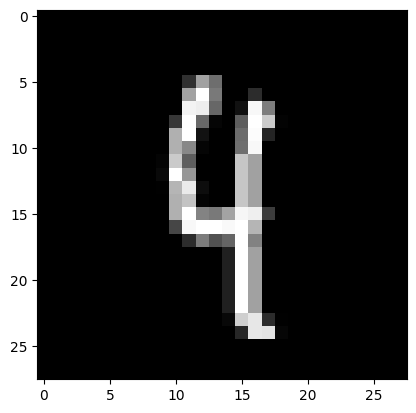

Our model says it is : 4


In [122]:
idx = int(random.randrange(0, X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28, 28)), cmap='gray')
plt.show()

cache = forward_prop(X_test[:, idx].reshape(
    X_test[:, idx].shape[0], 1), parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])